In [2]:
!pip install -q roboflow
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt
%pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.68 MiB | 17.88 MiB/s, done.
Resolving deltas: 100% (11714/11714), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.4/898.4 kB 20.3 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import glob
from getpass import getpass
from roboflow import Roboflow
import torch
import yaml
from IPython.display import Image,display,clear_output
print(f"SET UP COMPLETE. USING TORCH {torch.__version__} ({torch.cuda.get_device_properties(0).name})")

SET UP COMPLETE. USING TORCH 2.5.1+cu121 (Tesla T4)


In [ ]:
data_dir = '/content/drive/MyDrive/lane'
data_yaml='/content/drive/MyDrive/lane/data.yaml'
assert(os.path.exists(data_dir)) and (os.path.exists(data_yaml))

with open(data_yaml) as f:
  film=yaml.load(f,Loader=yaml.FullLoader)
  display(film)

film['train' ] = os.path.join(data_dir,'/content/drive/MyDrive/lane/train/images')
film['val']= os.path.join(data_dir,'/content/drive/MyDrive/lane/test/images')


{'train': '/content/drive/MyDrive/lane/train/images',
 'val': '/content/drive/MyDrive/lane/valid/images',
 'test': '/content/drive/MyDrive/lane/test/images',
 'nc': 1,
 'names': ['lane'],
 'roboflow': {'workspace': 'lanes-qp7qp',
  'project': 'culanes-m0cxq',
  'version': 1,
  'license': 'CC BY 4.0',
  'url': 'https://universe.roboflow.com/lanes-qp7qp/culanes-m0cxq/dataset/1'}}

In [ ]:
!python segment/train.py --img 640 --batch 32 --epochs 40 --data {data_yaml} --weights yolov5s-seg.pt --cache


Traceback (most recent call last):
  File "/content/yolov5/segment/train.py", line 30, in <module>
    import torch
  File "/usr/local/lib/python3.10/dist-packages/torch/__init__.py", line 2130, in <module>
    from torch import quantization as quantization  # usort: skip
  File "/usr/local/lib/python3.10/dist-packages/torch/quantization/__init__.py", line 2, in <module>
    from .fake_quantize import *  # noqa: F403
  File "/usr/local/lib/python3.10/dist-packages/torch/quantization/fake_quantize.py", line 10, in <module>
    from torch.ao.quantization.fake_quantize import (
  File "/usr/local/lib/python3.10/dist-packages/torch/ao/quantization/__init__.py", line 8, in <module>
    from .fake_quantize import *  # noqa: F403
  File "/usr/local/lib/python3.10/dist-packages/torch/ao/quantization/fake_quantize.py", line 10, in <module>
    from torch.ao.quantization.observer import (
  File "/usr/local/lib/python3.10/dist-packages/torch/ao/quantization/observer.py", line 17, in <module>
   

In [ ]:
# train_path = '/content/yolov5/runs/train-seg'
# train_folders=[folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path,folder))]
# print(f'triining exp 폴더 : {train_folders}')

# test_data_dir=film['val']
# training_folder='exp'


FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov5/runs/train-seg'

In [ ]:
!python segment/val.py --weights runs/train-seg/{training_folder}/weights/best.pt --data '/content/drive/MyDrive/lane/data.yaml' --img 640


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
segment/val: data=/content/drive/MyDrive/lane/data.yaml, weights=['runs/train-seg/{training_folder}/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5/segment/val.py", line 522, in <module>
    main(opt)
  File "/content/yolov5/segment/val.py", line 493, in main
    run(**vars(opt))

In [4]:
import os
from PIL import Image

# # Split path 설정
# if os.path.exists(os.path.join('/content/drive/MyDrive/lane', "test")):
#     split_path = os.path.join('/content/drive/MyDrive/lane', "test", "images")
# else:
#     split_path = os.path.join('/content/drive/MyDrive/lane', "valid", "images")

# # 예시 이미지 선택
# example_image_name = os.listdir(split_path)[0]
# example_image_path = os.path.join(split_path, example_image_name)

# 선택한 이미지 경로
import os
from PIL import Image

# 선택한 이미지 경로
image_to_test = "/content/drive/MyDrive/lane/test_set/images/snow2.PNG"

# 이미지 전처리: 크기 조정 및 형식 변환
def preprocess_image(input_path, output_path, size=(640, 640)):
    with Image.open(input_path) as img:
        img = img.resize(size, Image.LANCZOS)  # 이미지 크기 조정
        # RGBA 모드일 경우 RGB로 변환
        if img.mode == 'RGBA':
            img = img.convert('RGB')  # RGBA를 RGB로 변환
        img.save(output_path, format='JPEG')  # jpg 형식으로 저장

# 전처리된 이미지 저장 경로
processed_image_path = "/content/drive/MyDrive/train/train/Town04_Clear_Noon_09_09_2020_14_57_22_frame_0.jpg"

# 전처리 실행
preprocess_image(image_to_test, processed_image_path)
print(f"Processed and saved: {processed_image_path}")


Processed and saved: /content/drive/MyDrive/train/train/Town04_Clear_Noon_09_09_2020_14_57_22_frame_0.jpg


In [5]:
!python segment/predict.py --img 640 --weights /content/drive/MyDrive/lane/best1.pt --source /content/drive/MyDrive/lane/test_set/images/-2024-10-19-120351_png.rf.77a208f0bbad0657915a8c47cfc94ea1.jpg --conf 0.1


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
segment/predict: weights=['/content/drive/MyDrive/lane/best1.pt'], source=/content/drive/MyDrive/lane/test_set/images/-2024-10-19-120351_png.rf.77a208f0bbad0657915a8c47cfc94ea1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

In [51]:
!python segment/predict.py --weights /content/drive/MyDrive/lane/best1.pt --source /content/drive/MyDrive/lane/test_set/images/14498_22756_5732_png.rf.beae3e12dea29caf3bcd21c8834613c4.jpg --img 640 --conf 0.1 --save-txt --save-conf


segment/predict: weights=['/content/drive/MyDrive/lane/best1.pt'], source=/content/drive/MyDrive/lane/test_set/images/14498_22756_5732_png.rf.beae3e12dea29caf3bcd21c8834613c4.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/lane/test_set/images/14498_22756_5732_png.rf.beae3e12dea29caf3bcd21c8834613c4.jpg: 640x640 2 lanes, 14.7ms
Speed: 0.6ms pre-process, 14.7ms inferenc

In [52]:
import os
import cv2
import numpy as np

# 이미지 크기 정의
width = 640  # 원본 이미지의 너비
height = 640 # 원본 이미지의 높이

# 원본 이미지 불러오기
img = cv2.imread('/content/drive/MyDrive/lane/test_set/images/14498_22756_5732_png.rf.beae3e12dea29caf3bcd21c8834613c4.jpg')  # 원본 이미지 경로
mask = np.zeros(img.shape[:2], np.uint8)  # 마스크 초기화

# 레이블 파일 읽기
with open('/content/drive/MyDrive/lane/test_set/labels/14498_22756_5732_png.rf.beae3e12dea29caf3bcd21c8834613c4.txt', 'r') as f:
    for line in f:
        line = line.strip().split(" ")

        # 좌표 쌍 생성
        pts_part = []
        for i in range(1, len(line), 2):
            # 인덱스 범위 체크
            if i + 1 < len(line):  # 다음 인덱스가 범위 내에 있는지 확인
                pts_part.append([int(float(line[i]) * width), int(float(line[i + 1]) * height)])
            # else:
            #     print(f"Skipping incomplete coordinates: {line}")
            #     break  # 잘못된 좌표 쌍을 만나면 이 줄을 건너뜁니다.
        # pts_part가 비어있지 않은 경우에만 윤곽선 그리기
        if pts_part:
            # 윤곽선 그리기
            cv2.fillPoly(mask, [np.array(pts_part)], color=(255))
print(line)
print(pts_part)
# 마스크 적용
dst = cv2.bitwise_and(img, img, mask=mask)

# 결과 저장
output_path = os.path.join('/content/yolov5/runs/predict-seg/exp', 'output_image.jpg')  # 원하는 출력 경로
cv2.imwrite(output_path, dst)


['0', '0.3583333328125', '0.844380403125', '0.355', '0.844380403125', '0.20166666718749998', '0.99711815625', '0.2366666671875', '0.9913544671875', '0.3566666671875', '0.8645533140625', '0.3583333328125', '0.844380403125']
[[229, 540], [227, 540], [129, 638], [151, 634], [228, 553], [229, 540]]


True

In [56]:
import os
import cv2
import numpy as np

# 이미지 크기 정의
width = 640  # 원본 이미지의 너비
height = 640 # 원본 이미지의 높이

# 원본 이미지 불러오기
img = cv2.imread('/content/drive/MyDrive/lane/test_set/images/14498_22756_5732_png.rf.beae3e12dea29caf3bcd21c8834613c4.jpg')  # 원본 이미지 경로
mask = np.zeros(img.shape[:2], np.uint8)  # 마스크 초기화

# 레이블 파일 읽기
with open('/content/yolov5/runs/predict-seg/exp5/labels/14498_22756_5732_png.rf.beae3e12dea29caf3bcd21c8834613c4.txt', 'r') as f:
    for line in f:
        line = line.strip().split(" ")

        # 좌표 쌍 생성
        pts_part = []
        for i in range(1, len(line), 2):
            # 인덱스 범위 체크
            if i + 1 < len(line):  # 다음 인덱스가 범위 내에 있는지 확인
                pts_part.append([int(float(line[i]) * width), int(float(line[i + 1]) * height)])
            # else:
            #     print(f"Skipping incomplete coordinates: {line}")
            #     break  # 잘못된 좌표 쌍을 만나면 이 줄을 건너뜁니다.
        # pts_part가 비어있지 않은 경우에만 윤곽선 그리기
        if pts_part:
            # 윤곽선 그리기
            cv2.fillPoly(mask, [np.array(pts_part)], color=(255))
print(line)
print(pts_part)
# 마스크 적용
dst = cv2.bitwise_and(img, img, mask=mask)

# 결과 저장
output_path = os.path.join('/content/yolov5/runs/predict-seg/exp', 'answer.jpg')  # 원하는 출력 경로
# output_path = os.path.join('/content/yolov5/runs/predict-seg/exp', 'output_image.jpg')  # 원하는 출력 경로

cv2.imwrite(output_path, dst)


['0', '0.371875', '0.83125', '0.370313', '0.832812', '0.365625', '0.832812', '0.35625', '0.842188', '0.35625', '0.84375', '0.35', '0.85', '0.35', '0.851562', '0.326562', '0.875', '0.325', '0.875', '0.325', '0.876562', '0.321875', '0.879687', '0.320312', '0.879687', '0.3125', '0.8875', '0.310937', '0.8875', '0.303125', '0.895312', '0.301562', '0.895312', '0.3', '0.896875', '0.3', '0.898438', '0.298438', '0.9', '0.296875', '0.9', '0.253125', '0.94375', '0.251563', '0.94375', '0.25', '0.945312', '0.25', '0.946875', '0.246875', '0.95', '0.245312', '0.95', '0.24375', '0.951563', '0.24375', '0.953125', '0.2375', '0.959375', '0.2375', '0.960938', '0.234375', '0.964063', '0.232812', '0.964063', '0.232812', '0.965625', '0.207813', '0.990625', '0.207813', '0.992188', '0.20625', '0.99375', '0.20625', '0.998438', '0.229687', '0.998438', '0.229687', '0.996875', '0.235938', '0.990625', '0.235938', '0.989062', '0.239063', '0.985937', '0.240625', '0.985937', '0.242188', '0.984375', '0.242188', '0.9828

True

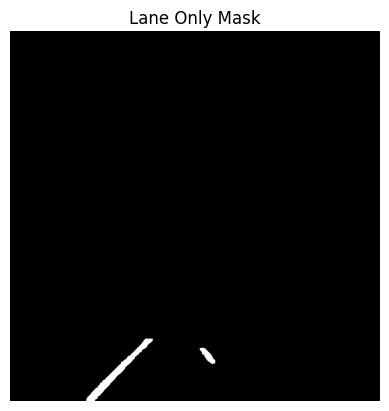

Enhanced mask image saved at: /content/yolov5/runs/predict-seg/exp/output_image.jpg


In [57]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 마스크 이미지 경로
mask_path = os.path.join('/content/yolov5/runs/predict-seg/exp', 'answer.jpg')
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # 마스크를 그레이스케일로 읽기

# 차선 픽셀만 남기기
lane_pixels = np.where(mask >= 10)  # 차선 픽셀

# 새로운 마스크 이미지를 생성 (배경을 모두 검정색으로 설정)
new_mask = np.zeros_like(mask)  # 기존 마스크와 동일한 크기의 검정색 이미지 생성
new_mask[lane_pixels] = 255  # 차선이 있는 위치에 흰색(255) 설정

# 새로운 마스크 이미지 시각화
plt.imshow(new_mask, cmap='gray')
plt.title('Lane Only Mask')
plt.axis('off')
plt.show()

# 새로운 마스크 이미지 저장 경로
final_output_path = os.path.join('/content/yolov5/runs/predict-seg/exp', 'output_image.jpg')

# 새로운 마스크 이미지 저장
cv2.imwrite(final_output_path, new_mask)
print(f"Enhanced mask image saved at: {final_output_path}")


In [66]:
import os
import cv2
import numpy as np

# 마스크 이미지 경로
mask_path = os.path.join('/content/yolov5/runs/predict-seg/exp', 'output_image.jpg')
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # 마스크를 그레이스케일로 읽기

# 차선과 배경의 픽셀 값
lane_pixels = np.where(mask > 10)  # 차선 픽셀
background_pixels = np.where(mask < 0)  # 배경 픽셀

# 이미지 전처리 함수 (모자 형태의 커널 적용)
def preprocess_image(image, a):
    # 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 모자 형태의 커널 생성: 가로 비율 a/2a/a
    kernel_width = 4 * a  # 총 너비는 4a
    kernel_height = 3  # 3개의 행으로 구성

    # 커널 초기화
    kernel = np.zeros((kernel_height, kernel_width), dtype=np.float32)

    kernel[0, a:3*a] = 1  # 첫 번째 행의 중간 2a 부분을 1로 설정
    kernel[1, a:3*a] = 1  # 두 번째 행의 중간 2a 부분을 1로 설정

    # -1 영역 정의 (세 번째 행)
    kernel[2, :] = -1     # 세 번째 행 전체를 -1로 채움

    # 커널을 사용하여 컨볼루션 적용
    filtered_image = cv2.filter2D(gray, -1, kernel)

    # 임계값 처리를 통해 윤곽선 강조
    _, contour_image = cv2.threshold(filtered_image, 50, 255, cv2.THRESH_BINARY)

    return contour_image

# 특징 추출 함수 정의
def extract_features(image, pixels, window_size=5):
    features = []
    half_window = window_size // 2

    for y, x in zip(pixels[0], pixels[1]):
        # 주변 영역 추출
        x_start = max(0, x - half_window)
        x_end = min(image.shape[1], x + half_window + 1)
        y_start = max(0, y - half_window)
        y_end = min(image.shape[0], y + half_window + 1)

        # 주변 영역의 평균값을 특징으로 사용
        window = image[y_start:y_end, x_start:x_end]
        mean_value = np.mean(window)
        features.append(mean_value)

    return np.array(features).reshape(-1, 1)  # 2차원 배열로 반환

# 원본 이미지 불러오기
img_path = '/content/drive/MyDrive/lane/test_set/images/14498_22756_5732_png.rf.beae3e12dea29caf3bcd21c8834613c4.jpg'
img = cv2.imread(img_path)
if img is None:
    raise ValueError("원본 이미지를 불러오는 데 실패했습니다.")

# 이미지 전처리
a = 6 # a의 값 설정
contour_image = preprocess_image(img, a)

# 차선 픽셀의 주변 픽셀 값 추출
lane_features = extract_features(contour_image, lane_pixels)

# 레이블 생성 (차선: 1)
labels = np.array([1] * lane_features.shape[0])  # 배경에 대한 레이블은 필요 없음
all_features = lane_features  # 배경은 포함하지 않음

# BDA를 통한 판별 함수 학습
def biased_discriminant_analysis(X, y, alpha=1.0):
    # 각 클래스의 평균 및 공분산 계산
    mean_lanes = np.mean(X[y == 1], axis=0)

    # 공분산 행렬의 정칙화
    cov_lanes = np.cov(X[y == 1], rowvar=False) + np.eye(X.shape[1]) * alpha

    # 공분산 행렬의 역행렬
    cov_inv = np.linalg.pinv(cov_lanes)

    # BDA 판별 함수의 계수
    coeff = cov_inv @ (mean_lanes)

    return coeff, mean_lanes

# BDA 적용
coeff, mean_lanes = biased_discriminant_analysis(all_features, labels)

# 예측
projections = all_features @ coeff
threshold = np.mean(projections)  # 평균 임계값 설정
predictions = (projections >= threshold).astype(int)

# 새 마스크 생성 (차선 픽셀 강화)
enhanced_mask = np.zeros_like(mask)
for i, pred in enumerate(predictions):
    if pred == 1:
        y, x = lane_pixels[0][i], lane_pixels[1][i]
        enhanced_mask[y, x] = 255  # 차선으로 예측된 픽셀은 흰색으로 설정

# 잡음 제거를 위한 모폴로지 연산
kernel = np.ones((4, 4), np.uint8)  # 3x3 커널
enhanced_mask = cv2.morphologyEx(enhanced_mask, cv2.MORPH_CLOSE, kernel)  # 닫힘 연산

# 최종 차선 마스크 저장
final_output_path = os.path.join('/content/yolov5/runs/predict-seg/exp', 'enhanced1_output_image.jpg')
cv2.imwrite(final_output_path, enhanced_mask)

# 디버깅 출력 (선택 사항)
print("BDA 적용 후 최종 차선 마스크 저장 경로:", final_output_path)


BDA 적용 후 최종 차선 마스크 저장 경로: /content/yolov5/runs/predict-seg/exp/enhanced1_output_image.jpg


In [61]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.segmentation import active_contour

# B-Snake 적용 함수 정의
def apply_bsnake(image, mask):
    # 이미지 전처리
    img_float = img_as_float(image)

    # 마스크에서 초기 곡선 생성 (B-Snake가 따라갈 초기 곡선)
    # 마스크의 1 값 위치 찾기
    y, x = np.where(mask > 0)  # 마스크에서 포인트 추출

    # 초기 곡선 포인트 배열 생성
    init = np.array([x, y]).T

    # B-Snake 적용
    snake = active_contour(img_float, init, alpha=0.015, beta=10, gamma=0.001,
                            boundary_condition='periodic')

    return snake

# 원본 이미지 불러오기
img_path = '/content/drive/MyDrive/train/train/Town04_Clear_Noon_09_09_2020_14_57_22_frame_0.jpg'
img = cv2.imread(img_path)
if img is None:
    raise ValueError("원본 이미지를 불러오는 데 실패했습니다.")

# enhanced_mask를 정의해야 합니다. 여기서는 이미 정의된 것으로 가정합니다.
# enhanced_mask = ...

# B-Snake 적용
bsnake_result = apply_bsnake(img, enhanced_mask)

# 결과 시각화
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.plot(bsnake_result[:, 0], bsnake_result[:, 1], '-r', lw=3)  # B-Snake 곡선
plt.title('B-Snake 적용 결과')
plt.axis('off')
plt.show()

# 최종 B-Snake 마스크 생성
final_bsnake_mask = np.zeros_like(enhanced_mask)
for point in bsnake_result.astype(int):
    cv2.circle(final_bsnake_mask, tuple(point), 1, (255), -1)

# 최종 B-Snake 마스크 저장
final_bsnake_output_path = os.path.join('/content/yolov5/runs/predict-seg/exp', 'bsnake_output_image.jpg')
cv2.imwrite(final_bsnake_output_path, final_bsnake_mask)

# 디버깅 출력 (선택 사항)
print("B-Snake 최종 마스크 저장 경로:", final_bsnake_output_path)


ValueError: 원본 이미지를 불러오는 데 실패했습니다.

In [ ]:
import os
import cv2
import numpy as np

# BDA 마스크 이미지 경로
bda_mask_path = os.path.join('/content/yolov5/runs/predict-seg/exp', 'enhanced_output_image.jpg')
bda_mask = cv2.imread(bda_mask_path, cv2.IMREAD_GRAYSCALE)

if bda_mask is None:
    raise ValueError("BDA 마스크 이미지를 불러오는 데 실패했습니다.")

# 왼쪽 라인과 오른쪽 라인 픽셀 찾기
left_lane_pixels = np.where(bda_mask[:, :bda_mask.shape[1] // 2] == 255)
right_lane_pixels = np.where(bda_mask[:, bda_mask.shape[1] // 2:] == 255)

# 예측된 차선 포인트 (y, x 좌표)
left_predicted_points = np.array([(y, x) for y, x in zip(left_lane_pixels[0], left_lane_pixels[1])])
right_predicted_points = np.array([(y, x + bda_mask.shape[1] // 2) for y, x in zip(right_lane_pixels[0], right_lane_pixels[1])])

# 차선 포인트가 충분히 있는지 확인
if len(left_predicted_points) < 2:
    raise ValueError("왼쪽 차선 포인트가 충분하지 않습니다.")
if len(right_predicted_points) < 2:
    raise ValueError("오른쪽 차선 포인트가 충분하지 않습니다.")

# 중간 포인트 계산
def get_middle_points(points):
    # y 값에 따라 정렬
    sorted_points = points[np.argsort(points[:, 0])]
    middle_points = []

    # 중간 포인트 계산
    for i in range(len(sorted_points) - 1):
        y_avg = (sorted_points[i][0] + sorted_points[i + 1][0]) // 2
        x_avg = (sorted_points[i][1] + sorted_points[i + 1][1]) // 2
        middle_points.append((y_avg, x_avg))

    return np.array(middle_points)

# 중간 포인트 생성
left_middle_points = get_middle_points(left_predicted_points)
right_middle_points = get_middle_points(right_predicted_points)

# 각 차선 그리기 함수
def draw_lane(mask, points, color=255):
    for i in range(len(points) - 1):
        pt1 = (points[i][1], points[i][0])  # (x, y)
        pt2 = (points[i + 1][1], points[i + 1][0])
        cv2.line(mask, pt1, pt2, color, thickness=5)

# 최종 차선 마스크 초기화
final_lane_mask = np.zeros_like(bda_mask)

# 각 차선을 그리기
draw_lane(final_lane_mask, left_middle_points, color=255)  # 왼쪽 차선
draw_lane(final_lane_mask, right_middle_points, color=255)  # 오른쪽 차선

# 최종 차선 마스크 저장
final_output_path = os.path.join('/content/yolov5/runs/predict-seg/exp', 'lane_output_image.jpg')
cv2.imwrite(final_output_path, final_lane_mask)

# 디버깅 출력
print("차선을 연결한 최종 마스크 저장 경로:", final_output_path)

# 원본 이미지 불러오기 (옵션)
original_image_path = '/content/drive/MyDrive/train/train/Town04_Clear_Noon_09_09_2020_14_57_22_frame_0.jpg'
original_image = cv2.imread(original_image_path)

if original_image is None:
    raise ValueError("원본 이미지를 불러오는 데 실패했습니다.")

# 차선 마스크를 3채널로 변환하여 원본 이미지와 합성 가능하게 만들기
final_lane_mask_color = cv2.cvtColor(final_lane_mask, cv2.COLOR_GRAY2BGR)

# 원본 이미지에 차선을 덧씌우기
result_image = cv2.addWeighted(original_image, 0.8, final_lane_mask_color, 0.2, 0)

# 결과 이미지 저장
result_output_path = os.path.join('/content/yolov5/runs/predict-seg/exp', 'result_image_with_lane.jpg')
cv2.imwrite(result_output_path, result_image)

print("원본 이미지에 차선을 덧씌운 결과 저장 경로:", result_output_path)


ValueError: BDA 마스크 이미지를 불러오는 데 실패했습니다.

In [ ]:
import os
import cv2
import numpy as np
from scipy.interpolate import CubicSpline

# 마스크 이미지 경로
mask_path = os.path.join('/content/yolov5/runs/predict-seg/exp', 'enhanced_output_image.jpg')
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# 차선 픽셀 추출
lane_pixels = np.where(mask > 0)
y_coords = lane_pixels[0]
x_coords = lane_pixels[1]

# Catmull-Rom spline 보간 함수 정의
def catmull_rom_spline(x, y, num_points=100):
    # 입력된 제어점을 Catmull-Rom spline으로 보간
    sorted_indices = np.argsort(x)
    x = np.array(x)[sorted_indices]
    y = np.array(y)[sorted_indices]

    # 중복된 x 값을 제거하고 고유한 x 값만 사용
    unique_x, unique_indices = np.unique(x, return_index=True)
    y = y[unique_indices]

    # CubicSpline을 사용하여 Catmull-Rom spline 보간 수행
    spline = CubicSpline(unique_x, y)

    # spline을 따라 부드러운 곡선을 생성
    x_interp = np.linspace(unique_x.min(), unique_x.max(), num_points)
    y_interp = spline(x_interp)

    return x_interp, y_interp

# Catmull-Rom spline 적용하여 보정된 차선 곡선 얻기
x_spline, y_spline = catmull_rom_spline(x_coords, y_coords)

# 새 마스크에 spline 차선 그리기
enhanced_spline_mask = np.zeros_like(mask)

# 보간된 곡선을 마스크에 그리기
for x, y in zip(x_spline, y_spline):
    x = int(round(x))
    y = int(round(y))
    if 0 <= x < enhanced_spline_mask.shape[1] and 0 <= y < enhanced_spline_mask.shape[0]:
        enhanced_spline_mask[y, x] = 255

# 잡음 제거를 위한 모폴로지 연산
kernel = np.ones((3, 3), np.uint8)  # 3x3 커널
enhanced_spline_mask = cv2.morphologyEx(enhanced_spline_mask, cv2.MORPH_CLOSE, kernel)  # 닫힘 연산

# 원본 이미지 불러오기
original_image_path = os.path.join('/content/drive/MyDrive/train/train', 'Town04_Clear_Noon_09_09_2020_14_57_22_frame_0.jpg')  # 원본 이미지 경로
original_image = cv2.imread(original_image_path)

# 마스크를 원본 이미지에 적용
# 3채널로 변환하여 색상 정보를 유지
enhanced_spline_mask_colored = cv2.cvtColor(enhanced_spline_mask, cv2.COLOR_GRAY2BGR)

# 마스크 적용: 원본 이미지와 마스크의 비트 AND 연산
result_image = cv2.addWeighted(original_image, 0.8, enhanced_spline_mask_colored, 0.2, 0)

# 최종 보정된 차선 마스크 저장
final_spline_output_path = os.path.join('/content/yolov5/runs/predict-seg/exp', 'enhanced_spline_output_image.jpg')
cv2.imwrite(final_spline_output_path, result_image)

# 디버깅 출력 (선택 사항)
print("Catmull-Rom spline 적용 후 최종 보정된 차선 마스크 저장 경로:", final_spline_output_path)


Catmull-Rom spline 적용 후 최종 보정된 차선 마스크 저장 경로: /content/yolov5/runs/predict-seg/exp/enhanced_spline_output_image.jpg


In [ ]:
import os
import cv2
import numpy as np
from scipy.interpolate import CubicSpline

# Catmull-Rom spline 보간 함수
def catmull_rom_spline(x, y, num_points=100):
    # 입력 좌표가 4개 미만인 경우 보간을 수행할 수 없으므로 그대로 반환
    if len(x) < 4:
        return x, y

    # CubicSpline을 이용해 Catmull-Rom spline 생성
    cs = CubicSpline(x, y)
    x_new = np.linspace(min(x), max(x), num_points)
    y_new = cs(x_new)
    return x_new, y_new

# 새 마스크에 spline 차선 그리기 함수
def draw_spline_on_image(image, x_spline, y_spline, color=(0, 0, 255), thickness=2):
    for i in range(1, len(x_spline)):
        # 이전 점과 현재 점을 연결하여 선을 그림
        start_point = (int(x_spline[i - 1]), int(y_spline[i - 1]))
        end_point = (int(x_spline[i]), int(y_spline[i]))
        cv2.line(image, start_point, end_point, color, thickness)
    return image

# 원본 이미지 불러오기
img_path = '/content/drive/MyDrive/train/train/Town04_Clear_Noon_09_09_2020_14_57_22_frame_0.jpg'
img = cv2.imread(img_path)
if img is None:
    raise ValueError("원본 이미지를 불러오는 데 실패했습니다.")

# x_coords와 y_coords를 정렬하여 보간 함수에 전달
unique_indices = np.unique(x_coords, return_index=True)[1]  # 중복 제거
x_unique = x_coords[unique_indices]
y_unique = y_coords[unique_indices]

# x와 y를 함께 정렬
sorted_indices = np.argsort(x_unique)
x_sorted = x_unique[sorted_indices]
y_sorted = y_unique[sorted_indices]

# 보정된 차선 좌표로 Catmull-Rom spline 생성
x_spline, y_spline = catmull_rom_spline(x_sorted, y_sorted)

# 원본 이미지 위에 spline 차선을 그림
result_image = draw_spline_on_image(img.copy(), x_spline, y_spline)

# 최종 이미지 저장 경로 설정
final_image_path = os.path.join('/content/yolov5/runs/predict-seg/exp', 'final_spline_image.jpg')

# 결과 이미지 저장
cv2.imwrite(final_image_path, result_image)

# 디버깅 출력 (선택 사항)
print("Catmull-Rom spline 적용 후 최종 이미지 저장 경로:", final_image_path)


Catmull-Rom spline 적용 후 최종 이미지 저장 경로: /content/yolov5/runs/predict-seg/exp/final_spline_image.jpg


--- YOLO Model ---
Precision: 0.8008
FPR: 0.0010
MAE: 0.2547

--- Post-Processed Model ---
Precision: 0.8253
FPR: 0.0005
MAE: 0.1214



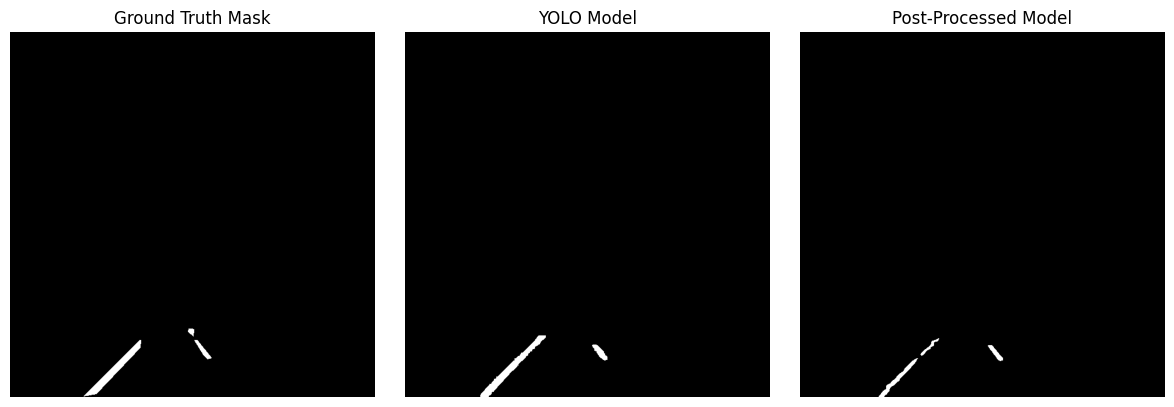

Results saved to 'mask_comparison_results.csv'.


In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 마스크 경로 설정 (수정 필요)
ground_truth_mask_path = '/content/yolov5/runs/predict-seg/exp/answer_image.jpg'  # 정답 마스크 경로
model1_mask_path = '/content/yolov5/runs/predict-seg/exp/output_image.jpg'         # YOLO 모델 마스크 경로
model2_mask_path = '/content/yolov5/runs/predict-seg/exp/enhanced1_output_image.jpg'  # 후처리 모델 마스크 경로

# 결과 저장용 리스트 초기화
results = []

def calculate_metrics(ground_truth, model_mask):
    """
    Precision, FPR, MAE를 계산합니다.
    """
    TP = np.sum(np.logical_and(ground_truth == 1, model_mask == 1))  # True Positives
    FP = np.sum(np.logical_and(ground_truth == 0, model_mask == 1))  # False Positives
    FN = np.sum(np.logical_and(ground_truth == 1, model_mask == 0))  # False Negatives
    TN = np.sum(np.logical_and(ground_truth == 0, model_mask == 0))  # True Negatives

    # Precision 계산
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    # FPR 계산
    fpr = FP / (FP + TN) if (FP + TN) > 0 else 0

    # MAE 계산
    mae = np.mean(np.abs(ground_truth - model_mask))

    return precision, fpr, mae

def compare_masks(ground_truth, model_mask, model_name):
    """
    각 모델의 성능 지표를 계산하고 결과 리스트에 저장합니다.
    """
    precision, fpr, mae = calculate_metrics(ground_truth, model_mask)

    results.append({
        'Model': model_name,
        'Precision': precision,
        'FPR': fpr,
        'MAE': mae
    })

    print(f'--- {model_name} ---')
    print(f'Precision: {precision:.4f}')
    print(f'FPR: {fpr:.4f}')
    print(f'MAE: {mae:.4f}\n')

def visualize_comparison(ground_truth, model1_mask, model2_mask):
    """
    정답 마스크와 모델 마스크를 시각화합니다.
    """
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title('Ground Truth Mask')
    plt.imshow(ground_truth, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('YOLO Model')
    plt.imshow(model1_mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Post-Processed Model')
    plt.imshow(model2_mask, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def main():
    # 정답 마스크 로드
    ground_truth_mask = cv2.imread(ground_truth_mask_path, cv2.IMREAD_GRAYSCALE)
    if ground_truth_mask is None:
        print("Error: Ground truth mask not found.")
        return
    ground_truth_mask = (ground_truth_mask > 128).astype(np.uint8)  # 이진화

    # YOLO 모델 마스크 로드
    model1_mask = cv2.imread(model1_mask_path, cv2.IMREAD_GRAYSCALE)
    if model1_mask is None:
        print("Error: Model 1 mask not found.")
        return
    model1_mask = (model1_mask > 128).astype(np.uint8)  # 이진화

    # 후처리 모델 마스크 로드
    model2_mask = cv2.imread(model2_mask_path, cv2.IMREAD_GRAYSCALE)
    if model2_mask is None:
        print("Error: Model 2 mask not found.")
        return
    model2_mask = (model2_mask > 128).astype(np.uint8)  # 이진화

    # 각 모델의 성능 비교
    compare_masks(ground_truth_mask, model1_mask, "YOLO Model")
    compare_masks(ground_truth_mask, model2_mask, "Post-Processed Model")

    # 마스크 시각화
    visualize_comparison(ground_truth_mask, model1_mask, model2_mask)

    # 결과를 데이터프레임으로 변환 후 CSV 파일로 저장
    results_df = pd.DataFrame(results)
    results_df.to_csv('mask_comparison_results.csv', index=False)
    print("Results saved to 'mask_comparison_results.csv'.")

if __name__ == "__main__":
    main()


In [14]:
--- YOLO Model ---
Precision: 0.4449
FPR: 0.0032
MAE: 0.8096

--- Post-Processed Model ---
Precision: 0.6191
FPR: 0.0010
MAE: 0.2441

--- YOLO Model ---
Precision: 0.9268
FPR: 0.0002
MAE: 0.0475

--- Post-Processed Model ---
Precision: 0.9198
FPR: 0.0001
MAE: 0.0323

TypeError: '>' not supported between instances of 'NoneType' and 'int'